<a href="https://colab.research.google.com/github/hardeali/lasrdataseince/blob/main/Latest_Data_Science_Job_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/KSARAM/Latest-Data-Science-Job-Salaries-2020---2024">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Latest Data Science Job Salaries 2020 - 2024**
This dataset provides insights into data science job salaries from 2020 to 2024, including information on experience levels, employment types, job titles, and company characteristics. It serves as a valuable resource for understanding salary trends and factors influencing compensation in the data science field.

**Features:**


1.   **work_year:** The year of the data related to the job salary.
2.   **experience_level:** The level of experience of the employee (e.g., entry-level, mid-level, senior-level).
3. **employment_type:** The type of employment (e.g., full-time, part-time, contract).
4. **job_title:** The title or role of the employee within the data science field.
5. **salary_in_usd:** The salary converted to US dollars for standardization.
6. **employee_residence:** The residence location of the employee.
7. **remote_ratio:** The ratio of remote work allowed for the position.
8. **company_size:** The size of the company based on employee count or revenue.








In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataScience_salaries_2024.csv to DataScience_salaries_2024.csv


In [ ]:
mydata = pd.read_csv('DataScience_salaries_2024.csv')

In [ ]:
mydata.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,2021,MI,FT,Data Scientist,40038,CL,100,L
1,2021,MI,FT,BI Data Analyst,36259,HU,50,L
2,2020,MI,FT,Data Scientist,35735,HU,50,L
3,2021,MI,FT,ML Engineer,77364,JP,50,S
4,2022,SE,FT,Lead Machine Learning Engineer,95386,IN,50,L


In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary_in_usd       14838 non-null  int64 
 5   employee_residence  14838 non-null  object
 6   remote_ratio        14838 non-null  int64 
 7   company_size        14838 non-null  object
dtypes: int64(3), object(5)
memory usage: 927.5+ KB


In [ ]:
mydata.describe()

,work_year,salary_in_usd,remote_ratio
count,14838.000000,14838.000000,14838.000000
mean,2023.138900,149874.718763,32.760480
std,0.700799,69009.181349,46.488278
min,2020.000000,15000.000000,0.000000
25%,2023.000000,102000.000000,0.000000
50%,2023.000000,141300.000000,0.000000
75%,2024.000000,185900.000000,100.000000
max,2024.000000,800000.000000,100.000000


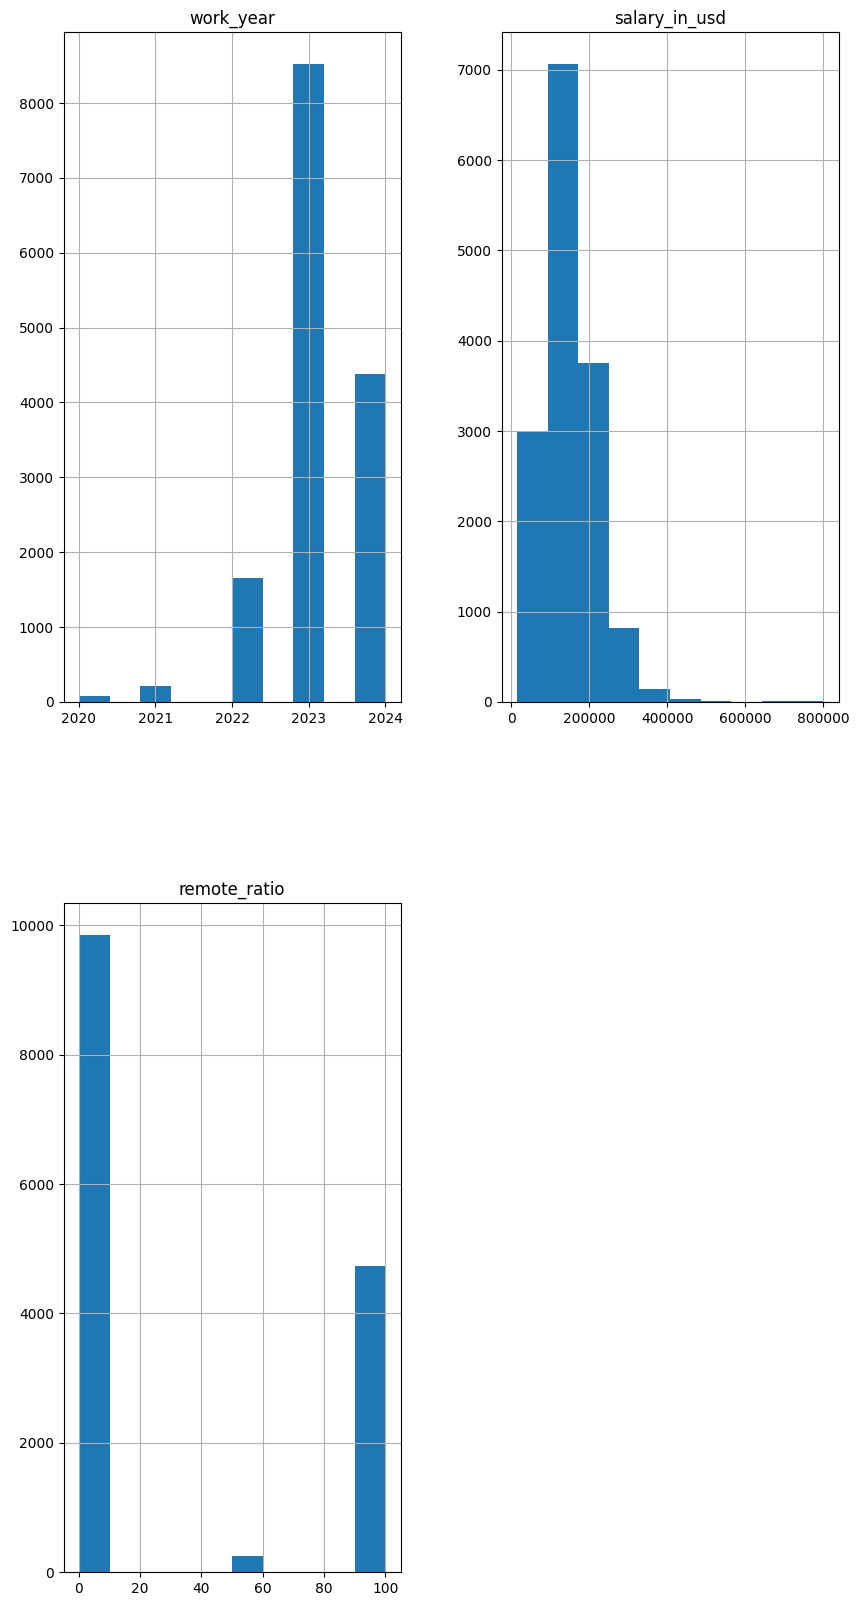

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(10,20))
plt.show()

In [ ]:
pd.crosstab(mydata['work_year'],mydata['experience_level'] )

experience_level,EN,EX,MI,SE
work_year,,,,
2020,21,4,31,19
2021,46,10,87,75
2022,116,41,358,1137
2023,464,242,1716,6097
2024,501,144,1361,2368


In [ ]:
pd.crosstab(mydata['employment_type'],mydata['experience_level'] )

experience_level,EN,EX,MI,SE
employment_type,,,,
CT,7,1,12,6
FL,3,0,6,4
FT,1117,440,3532,9683
PT,21,0,3,3


<Axes: xlabel='company_size', ylabel='count'>

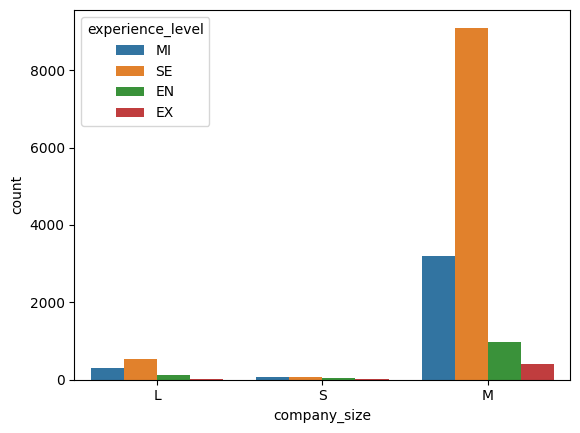

In [ ]:
sns.countplot(x="company_size", hue="experience_level", data=mydata)

array([[<Axes: title={'center': 'CT'}>, <Axes: title={'center': 'FL'}>],
       [<Axes: title={'center': 'FT'}>, <Axes: title={'center': 'PT'}>]],
      dtype=object)

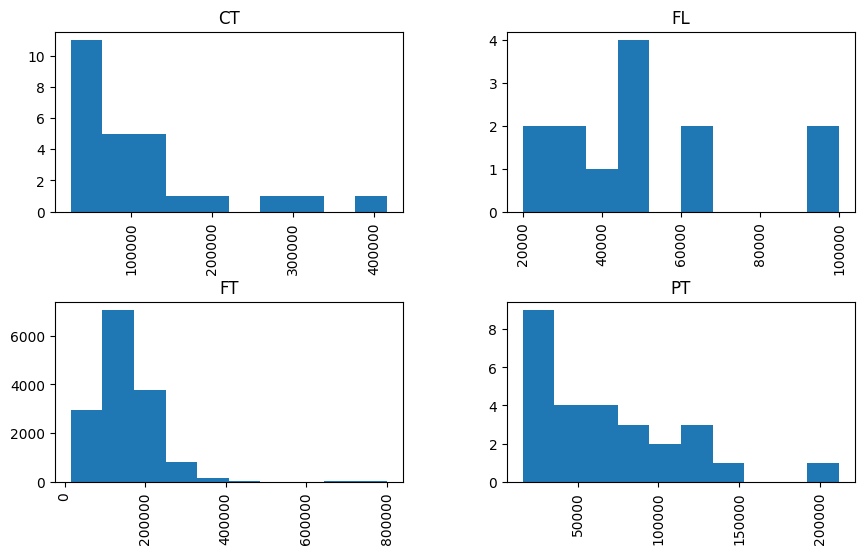

In [ ]:
mydata.hist(by='employment_type',column = 'salary_in_usd' , figsize=(10,6))

array([[<Axes: title={'center': '2020'}>,
        <Axes: title={'center': '2021'}>],
       [<Axes: title={'center': '2022'}>,
        <Axes: title={'center': '2023'}>],
       [<Axes: title={'center': '2024'}>, <Axes: >]], dtype=object)

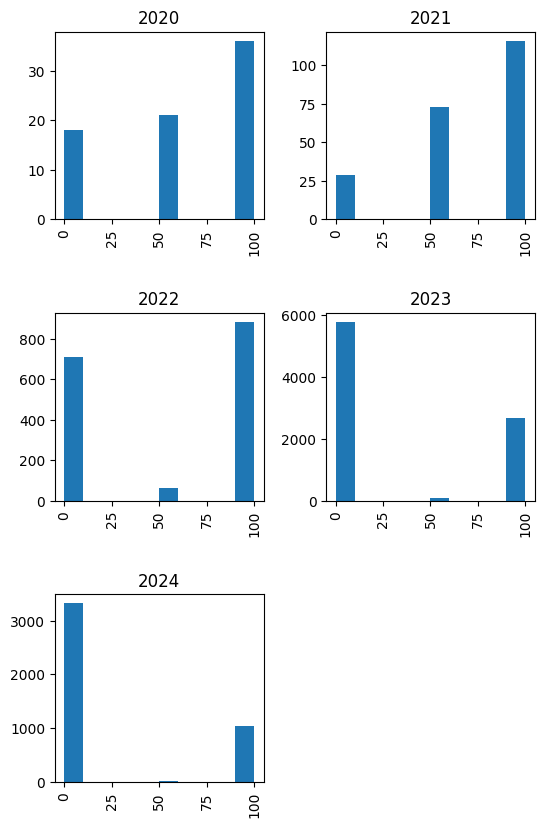

In [ ]:
mydata.hist(by='work_year',column = 'remote_ratio' , figsize=(6,10))

array([[<Axes: title={'center': 'L'}>, <Axes: title={'center': 'M'}>],
       [<Axes: title={'center': 'S'}>, <Axes: >]], dtype=object)

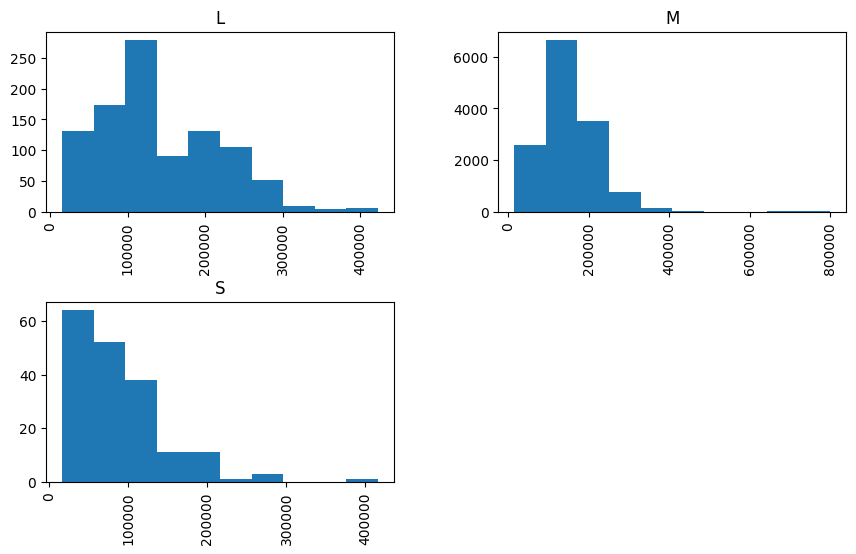

In [ ]:
mydata.hist(by='company_size',column = 'salary_in_usd' , figsize=(10,6) )

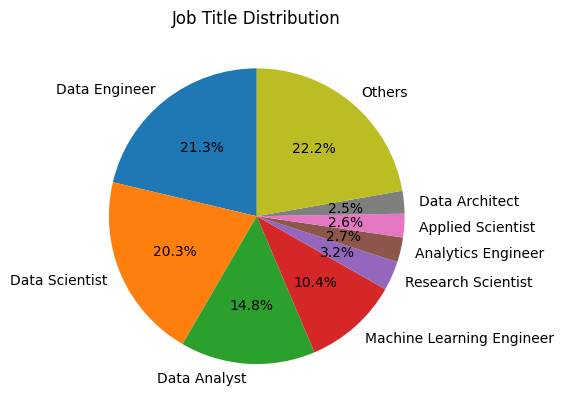

In [ ]:
platform_counts = mydata['job_title'].value_counts()

# Calculate the percentage of each job title
total_count = platform_counts.sum()
platform_percentages = (platform_counts / total_count) * 100

# Separate the job titles into main categories and 'Others'
threshold = 2  # 2% threshold
main_categories = platform_percentages[platform_percentages >= threshold]
others = platform_percentages[platform_percentages < threshold]

# Sum the 'Others' categories
others_sum = others.sum()

# Append 'Others' to the main categories
main_categories['Others'] = others_sum

# Plotting
plt.pie(main_categories, labels=main_categories.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Title Distribution')

plt.show()

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

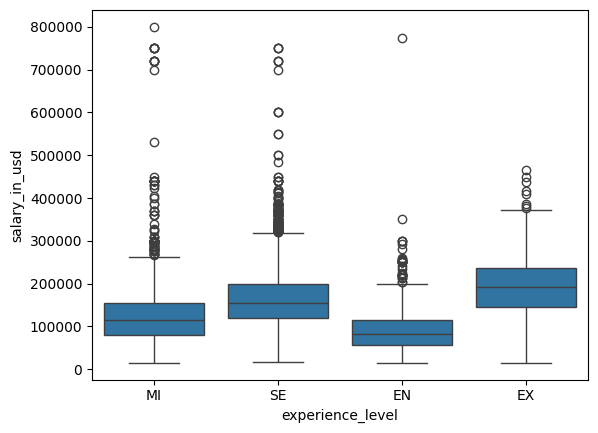

In [ ]:
sns.boxplot(x="experience_level", y="salary_in_usd", data=mydata)


In [ ]:
mydata['salary_in_usd'].mean()

149874.71876263648

In [ ]:
mydata['salary_in_usd'].std()

69009.18134882064

<ipython-input-18-a4e49c7df361>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mydata['salary_in_usd'])


<Axes: xlabel='salary_in_usd', ylabel='Density'>

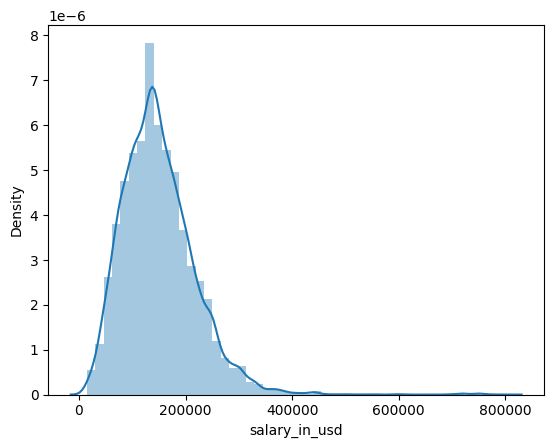

In [ ]:
sns.distplot(mydata['salary_in_usd'])

array([[<Axes: title={'center': 'CT'}>, <Axes: title={'center': 'FL'}>],
       [<Axes: title={'center': 'FT'}>, <Axes: title={'center': 'PT'}>]],
      dtype=object)

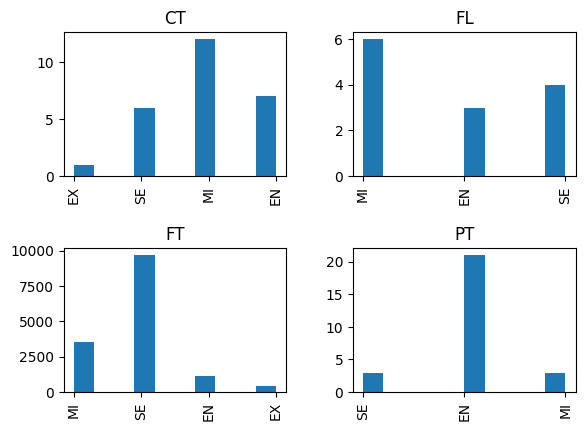

In [ ]:
mydata.hist(by='employment_type',column = 'experience_level')

array([[<Axes: title={'center': 'AD'}>, <Axes: title={'center': 'AE'}>,
        <Axes: title={'center': 'AM'}>, <Axes: title={'center': 'AR'}>,
        <Axes: title={'center': 'AS'}>, <Axes: title={'center': 'AT'}>,
        <Axes: title={'center': 'AU'}>, <Axes: title={'center': 'BA'}>,
        <Axes: title={'center': 'BE'}>],
       [<Axes: title={'center': 'BG'}>, <Axes: title={'center': 'BO'}>,
        <Axes: title={'center': 'BR'}>, <Axes: title={'center': 'CA'}>,
        <Axes: title={'center': 'CF'}>, <Axes: title={'center': 'CH'}>,
        <Axes: title={'center': 'CL'}>, <Axes: title={'center': 'CN'}>,
        <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'CR'}>, <Axes: title={'center': 'CY'}>,
        <Axes: title={'center': 'CZ'}>, <Axes: title={'center': 'DE'}>,
        <Axes: title={'center': 'DK'}>, <Axes: title={'center': 'DO'}>,
        <Axes: title={'center': 'DZ'}>, <Axes: title={'center': 'EC'}>,
        <Axes: title={'center': 'EE'}>],
       [<Axes

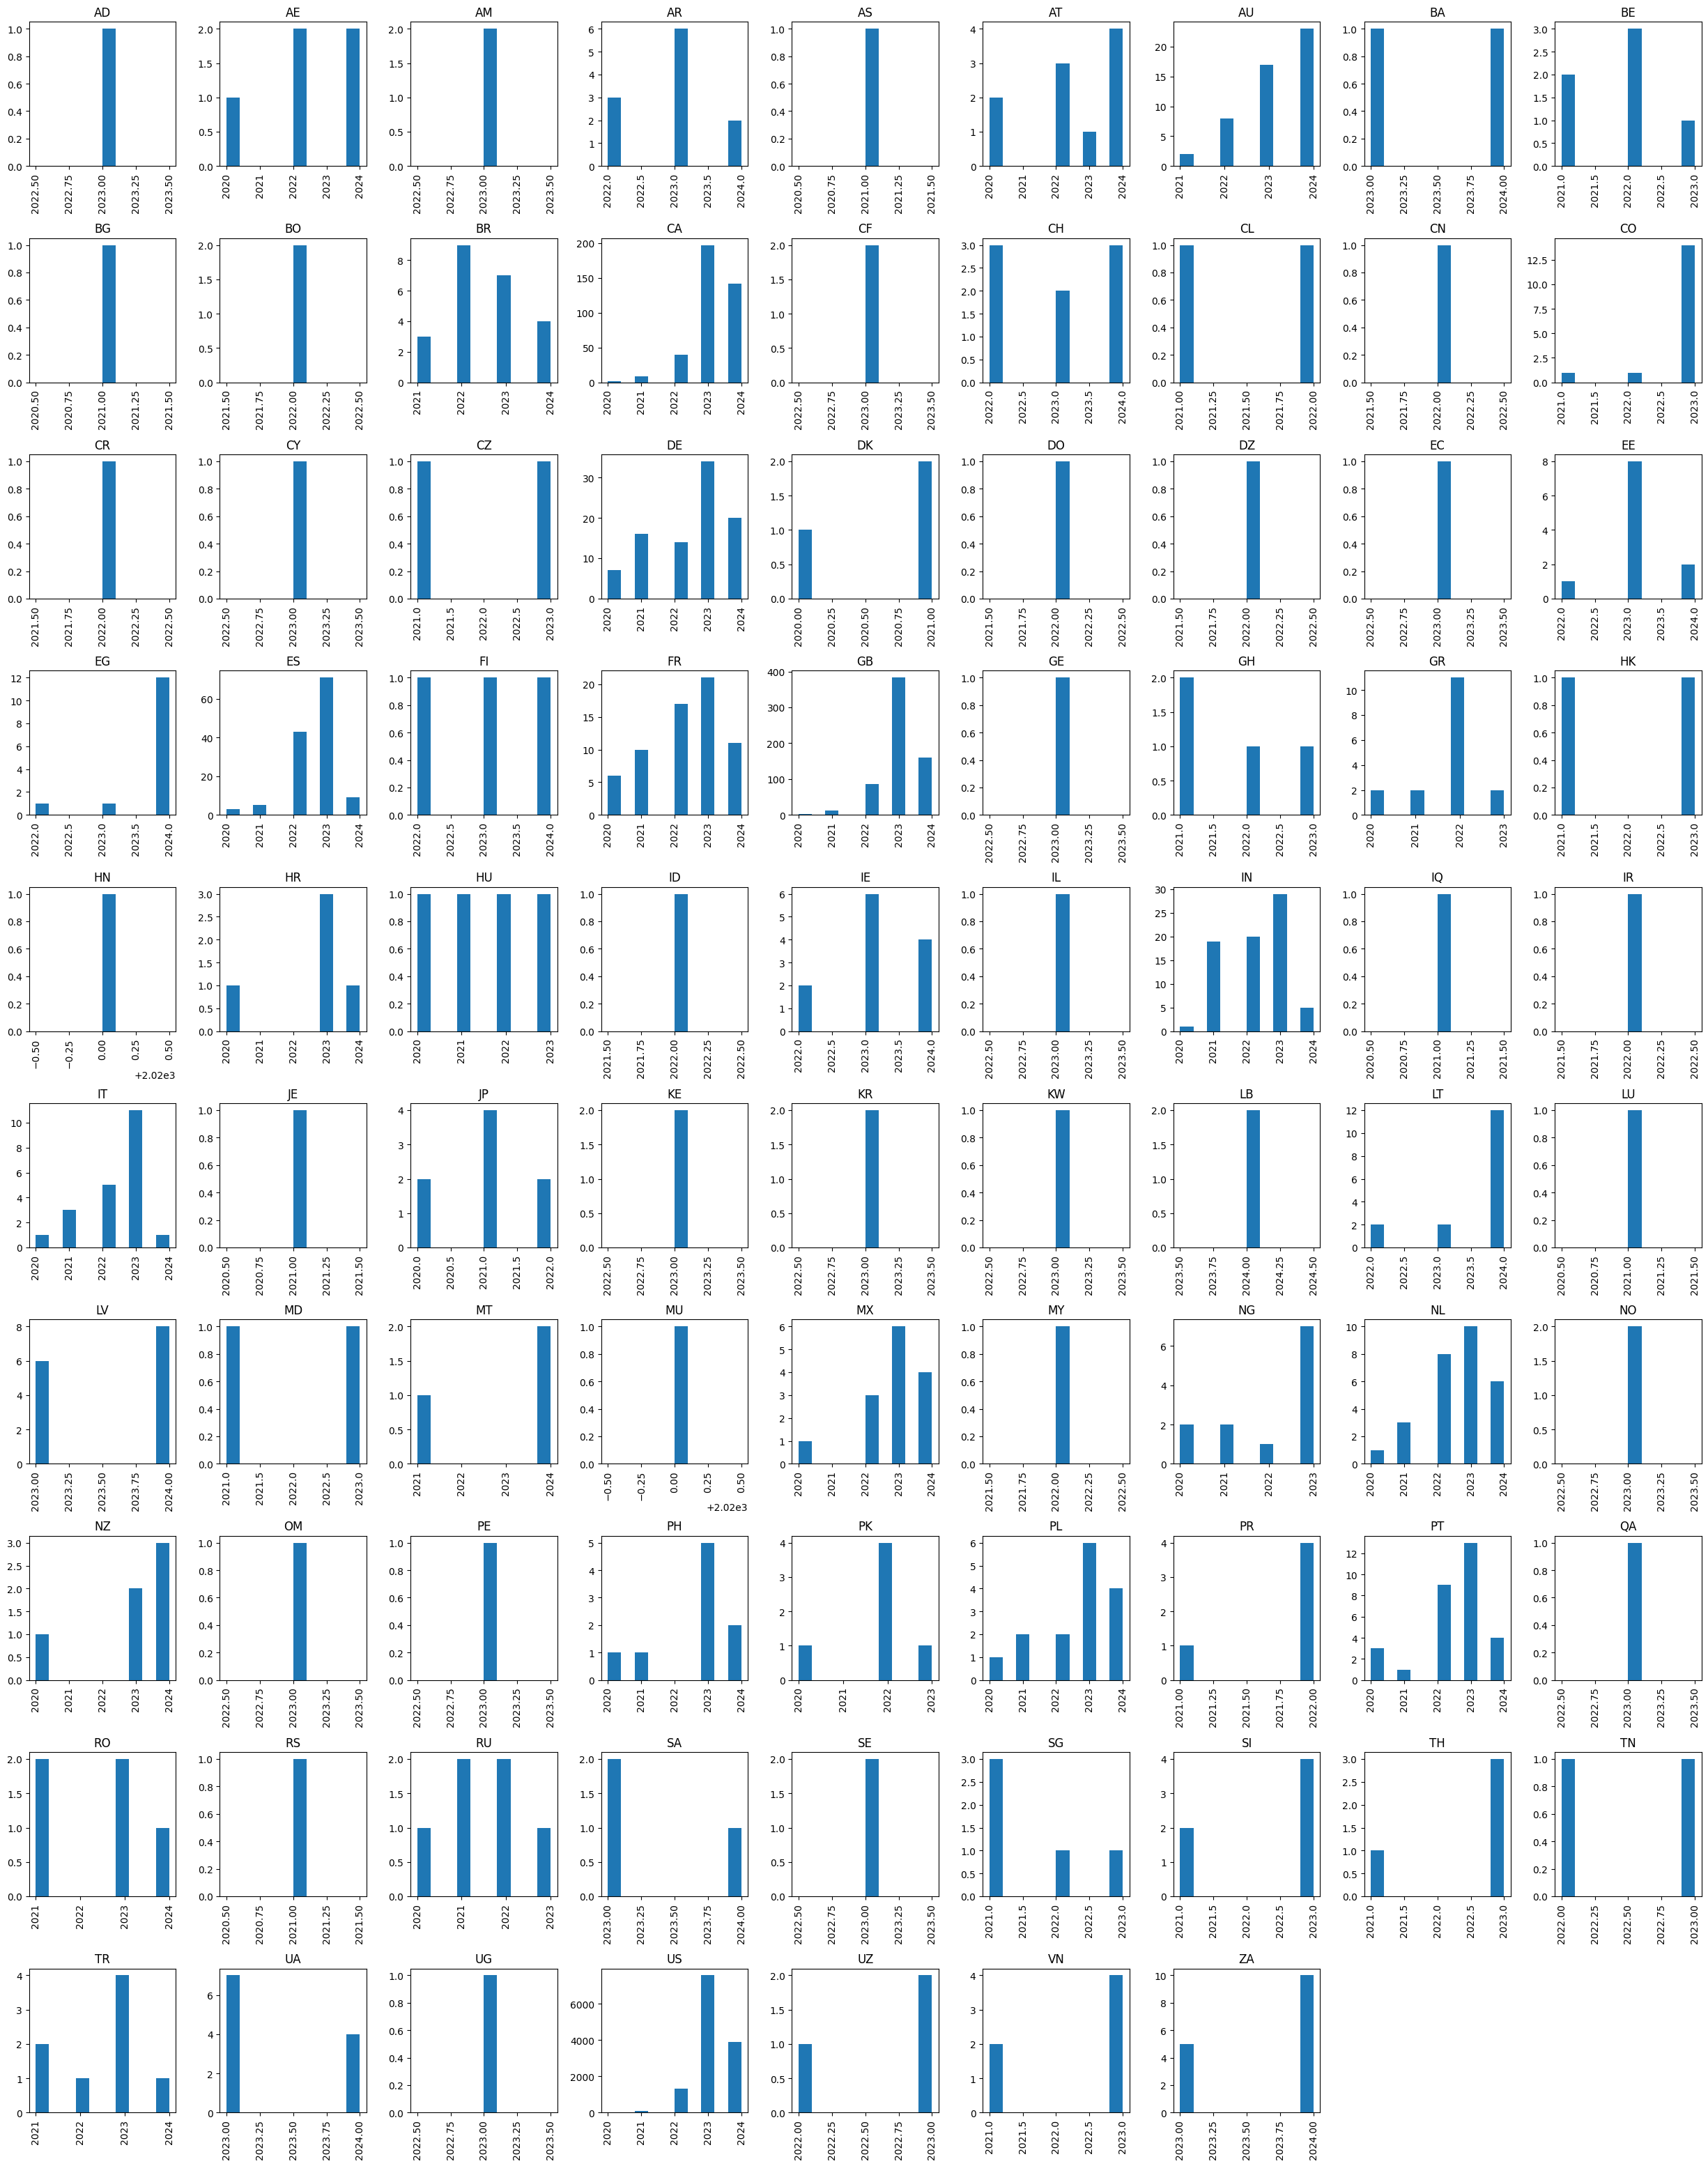

In [ ]:
mydata.hist(by='employee_residence',column = 'work_year',figsize=(30,40))

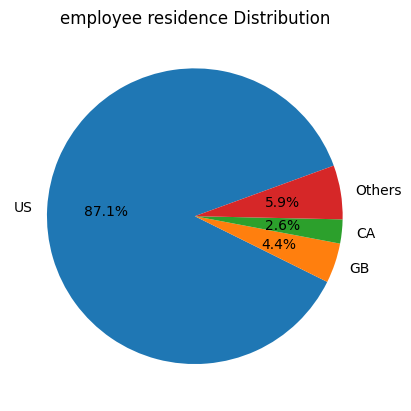

In [ ]:
platform_counts = mydata['employee_residence'].value_counts()


total_count = platform_counts.sum()
platform_percentages = (platform_counts / total_count) * 100


threshold = 1
main_categories = platform_percentages[platform_percentages >= threshold]
others = platform_percentages[platform_percentages < threshold]


others_sum = others.sum()


main_categories['Others'] = others_sum


plt.pie(main_categories, labels=main_categories.index, autopct='%1.1f%%', startangle=20)
plt.title('employee residence Distribution')

plt.show()

In [ ]:
 mead = np.median (mydata.salary_in_usd)
 mead

141300.0

In [ ]:
xbar = mydata.salary_in_usd.mean()
xbar

149874.71876263648

In [ ]:
mydata.salary_in_usd.var()

4762267110.434414

In [ ]:
sigma = mydata.salary_in_usd.std()
sigma

69009.18134882064

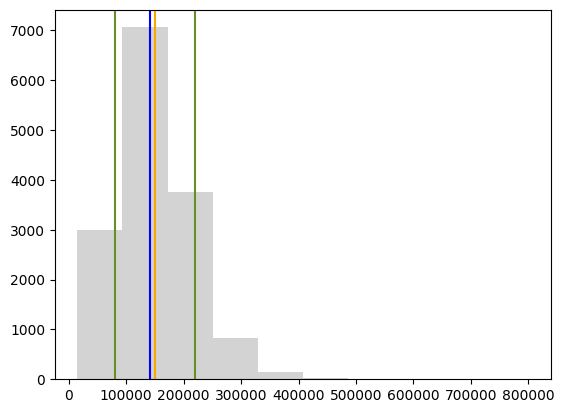

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
plt.axvline(x = mead, color='blue')
_ = plt.hist(mydata.salary_in_usd, color = 'lightgray')